# Prerequisites

In [1]:
import os
import shutil

import matplotlib.pyplot as plt
import numpy as np
from IPython.display import clear_output
from PIL import Image
from scipy.io import loadmat

In [2]:
data_dir = "../data"
val_img_dir = f"{data_dir}/val_images"

# Load examples

In [3]:
meta = loadmat(f"{data_dir}/meta.mat")

In [4]:
for entry in meta["synsets"]:
    for name in ("shirt", "cowboy", "cardigan", "necklace", "umbrella", "coat", "tie"):
        if name in entry[0][2].item().lower():
            print(entry[0][0].item(), entry[0][2].item())

26 soft-coated wheaten terrier
50 Cardigan, Cardigan Welsh corgi
109 Scotch terrier, Scottish terrier, Scottie
144 curly-coated retriever
146 flat-coated retriever
220 umbrella
656 chiton, coat-of-mail shell, sea cradle, polyplacophore
755 necklace
757 fur coat
817 bow tie, bow-tie, bowtie
825 trench coat
836 cardigan
837 sweatshirt
881 cowboy hat, ten-gallon hat
910 cowboy boot
918 lab coat, laboratory coat
935 Windsor tie
940 bolo tie, bolo, bola tie, bola
961 jersey, T-shirt, tee shirt
1760 vest, waistcoat
1765 necktie, tie
1769 coat
1770 raincoat, waterproof
1774 shirt
1804 body armor, body armour, suit of armor, suit of armour, coat of mail, cataphract


In [5]:
labels = np.loadtxt(f"{data_dir}/ILSVRC2012_validation_ground_truth.txt").astype(int)

In [6]:
class_item_indices = {}
for idx, name in (
    (220, "umbrella"),
    (817, "bow tie"),
    (825, "trench coat"),
    (836, "cardigan"),
    (837, "sweatshirt"),
    (881, "cowboy"),
    (910, "cowboy boot"),
    (918, "lab coat"),
    (935, "Windsor tie"),
    (961, "jersey"),
):
    class_item_indices[name.split()[-1]] = np.where(labels == idx)[0]
class_item_indices.keys()

dict_keys(['umbrella', 'tie', 'coat', 'cardigan', 'sweatshirt', 'cowboy', 'boot', 'jersey'])

In [7]:
class_item_indices

{'umbrella': array([  380,  2232,  2975,  4815,  5225,  6259,  8574,  8908,  9472,
        13643, 14595, 14614, 14771, 15274, 15770, 16971, 17126, 17823,
        19265, 19808, 20281, 21899, 22729, 22987, 24620, 25040, 26689,
        28132, 29228, 29271, 30148, 30929, 31399, 32000, 32100, 32661,
        36057, 37236, 38294, 38777, 39937, 40190, 40203, 40983, 41544,
        42719, 46428, 48491, 48992, 49951], dtype=int64),
 'tie': array([  105,   284,  1180,  1654,  4157,  4615,  4857,  5425,  5651,
         5795,  6137,  6153,  6437,  7763,  8046,  9247,  9549,  9628,
        10782, 10904, 11465, 11732, 11760, 12083, 13768, 14236, 15777,
        16001, 18038, 18688, 19772, 20605, 21417, 21971, 22571, 22781,
        23813, 30973, 31550, 34136, 35333, 37544, 38219, 41021, 43769,
        44297, 45272, 45862, 48706, 49282], dtype=int64),
 'coat': array([ 2626,  2656,  4188,  4536,  4725,  7702,  7858,  9126, 10468,
        11300, 15322, 16122, 16304, 16355, 16957, 18457, 19358, 19734,
     

In [8]:
print([len(indices) for indices in class_item_indices.values()])

[50, 50, 50, 50, 50, 50, 50, 50]


In [9]:
files = os.listdir(val_img_dir)

In [10]:
size = 2

# for name in class_item_indices:
#     fig, axs = plt.subplots(10, 5, figsize=(5 * size, 10 * size), tight_layout=True)
#     axs = np.asarray(axs).ravel()
#     fig.suptitle(name)
#     for idx, ax in zip(class_item_indices[name], axs):
#         img = np.array(Image.open(f"{val_img_dir}/{files[idx]}"))
#         ax.imshow(img)
#         ax.set_axis_off()

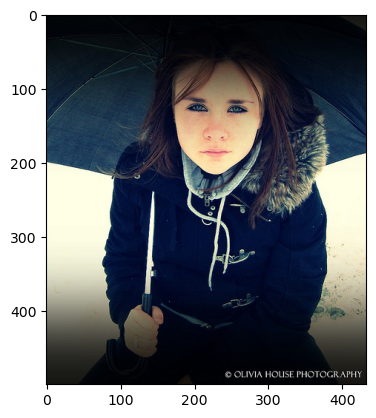


KeyboardInterrupt



In [11]:
class_item_indices_filtered = {k: list() for k in class_item_indices}

size = 2

for k, indices in class_item_indices.items():
    for idx in indices:
        img = np.array(Image.open(f"{val_img_dir}/{files[idx]}"))
        clear_output(wait=True)
        plt.imshow(img)
        plt.show()
        done = False
        while not done:
            y_n = input("y/n").lower()
            if y_n in "yn" and len(y_n):
                done = True
        if y_n == "y":
            class_item_indices_filtered[k].append(idx)

In [ ]:
total = 0
for indices in class_item_indices_filtered.values():
    total += len(indices)
total

In [ ]:
# dst_dir = f"{data_dir}/val_humans"
# for indices in class_item_indices_filtered.values():
#     for idx in indices:
#         f = files[idx]
#         shutil.copy(f"{data_dir}/val_images/{f}", dst_dir)